[*********************100%***********************]  57 of 57 completed


{'previousClose': 166.89,
 'regularMarketOpen': 162.43,
 'twoHundredDayAverage': 186.93309,
 'trailingAnnualDividendYield': 0.010725628,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 166.25,
 'navPrice': 161.46,
 'averageDailyVolume10Day': 3098662,
 'totalAssets': 23443523584,
 'regularMarketPreviousClose': 166.89,
 'fiftyDayAverage': 182.586,
 'trailingAnnualDividendRate': 1.79,
 'open': 162.43,
 'toCurrency': None,
 'averageVolume10days': 3098662,
 'expireDate': None,
 'yield': 0.0171,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 160.6,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 1565089,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 1089948,
 'priceToSalesTrailing12Months': None,
 'dayLow': 160.6,
 'ask': 162.15,
 'ytdReturn': Non

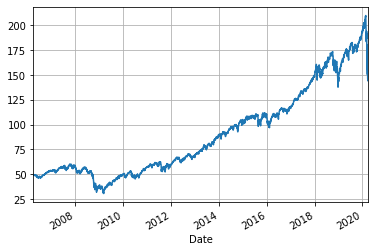

In [32]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

start_sp = datetime.datetime(2006,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry


BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
SP500_detail.info


In [33]:
SP500_dat

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-03-31,61.130001,61.189999,60.689999,60.900002,49.453735,176400.0
2006-04-03,61.400002,61.400002,60.700001,60.820000,49.388763,319500.0
2006-04-04,60.700001,61.180000,60.599998,61.000000,49.534924,185900.0
2006-04-05,61.000000,61.340000,60.970001,61.279999,49.762318,2110600.0
2006-04-06,61.150002,61.340000,60.880001,61.130001,49.640491,174800.0
...,...,...,...,...,...,...
2020-03-23,146.880005,148.179993,140.839996,144.559998,144.099426,2807200.0
2020-03-24,152.130005,157.899994,151.660004,157.880005,157.376999,1612000.0
2020-03-25,158.369995,164.360001,154.559998,158.240005,158.240005,9101800.0


In [34]:
#les rendements quotidiens
from pandas_datareader import data, wb
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF

In [35]:
df

,IVV,IWF,IJH,IJR,IWM,IWD,ITOT,IVW,IWB,IWR,...,IYT,JKI,IYZ,IGE,IYE,JKL,IYM,JKJ,JKK,IGN
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-31,97.379745,43.835457,64.867470,27.305260,62.645969,52.288296,22.073471,49.453735,54.196903,18.870403,...,69.529060,55.831425,17.642904,24.334955,22.390329,55.728748,43.385075,68.884056,71.283554,33.773190
2006-04-03,97.364769,43.719097,64.793869,27.091785,62.126469,52.309769,22.067776,49.388763,54.181564,18.850468,...,70.239494,55.881264,17.676991,24.512449,22.519102,55.385803,43.671722,68.614693,70.734169,34.013634
2006-04-04,98.039360,43.835457,64.908432,27.292706,62.406845,52.717419,22.215940,49.534924,54.495930,18.922224,...,71.051430,56.166050,17.792883,24.710232,22.796095,55.535831,43.811169,68.892479,71.050774,33.708450
2006-04-05,98.391655,44.009995,65.407524,27.359678,62.728458,52.996349,22.305222,49.762318,54.741238,19.065742,...,71.787216,56.543400,17.813328,25.121012,23.119261,55.828770,44.299259,69.321770,71.451157,34.050610
2006-04-06,98.196739,43.985069,65.464798,27.368053,62.860378,52.788921,22.263428,49.640491,54.595570,19.045805,...,71.837967,56.336922,17.697435,25.230045,23.143560,55.707314,44.554909,69.347015,71.562943,34.374287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-23,223.251190,131.240570,121.026871,48.878159,99.515213,84.450951,49.423660,144.099426,122.310425,36.570423,...,119.387589,90.223869,22.436712,13.769235,12.455172,73.361336,59.323307,106.628593,142.126724,38.058533
2020-03-24,244.349014,143.224991,134.059006,53.128002,108.620003,93.137001,53.971001,157.376999,133.905991,40.603996,...,134.920990,101.045998,23.774000,15.804000,14.459001,80.826996,65.959000,117.893997,157.401016,41.996998
2020-03-25,247.470001,144.320007,138.399994,53.590000,109.970001,95.320000,54.930000,158.240005,135.789993,41.939999,...,138.539993,103.559998,23.860001,16.379999,15.140000,84.660004,68.330002,121.019997,161.050003,42.730000


In [36]:
df['IVV']

Date
2006-03-31     97.379745
2006-04-03     97.364769
2006-04-04     98.039360
2006-04-05     98.391655
2006-04-06     98.196739
                 ...    
2020-03-23    223.251190
2020-03-24    244.349014
2020-03-25    247.470001
2020-03-26    262.369995
2020-03-27    254.240005
Name: IVV, Length: 3522, dtype: float64

# Pour chacun des ETF, vous fournissez les statistiques de base

In [37]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

In [38]:
list_etf


[count    3522.000000
 mean      159.576637
 std        68.986802
 min        54.039368
 25%       104.124407
 50%       135.481300
 75%       202.053013
 max       337.763702
 Name: IVV, dtype: float64, count    3522.000000
 mean       79.391695
 std        39.157323
 min        26.097328
 25%        47.343147
 50%        64.594700
 75%        99.617023
 max       191.721085
 Name: IWF, dtype: float64, count    3522.000000
 mean      111.617282
 std        47.411608
 min        34.310242
 25%        69.701452
 50%       101.638081
 75%       145.422661
 max       209.329269
 Name: IJH, dtype: float64, count    3522.000000
 mean       44.739011
 std        19.950137
 min        12.972113
 25%        27.480909
 50%        39.010616
 75%        57.910580
 max        87.845085
 Name: IJR, dtype: float64, count    3522.000000
 mean       93.471469
 std        36.729666
 min        29.328701
 25%        62.628943
 50%        84.507229
 75%       117.361406
 max       169.051758
 Name: IWM, 

In [39]:
df_describe = pd.DataFrame(list_etf)

In [40]:
df_describe

,count,mean,std,min,25%,50%,75%,max
IVV,3522.0,159.576637,68.986802,54.039368,104.124407,135.481300,202.053013,337.763702
IWF,3522.0,79.391695,39.157323,26.097328,47.343147,64.594700,99.617023,191.721085
IJH,3522.0,111.617282,47.411608,34.310242,69.701452,101.638081,145.422661,209.329269
IJR,3522.0,44.739011,19.950137,12.972113,27.480909,39.010616,57.910580,87.845085
IWM,3522.0,93.471469,36.729666,29.328701,62.628943,84.507229,117.361406,169.051758
IWD,3522.0,76.328725,27.753142,26.188761,53.759694,68.342270,96.301929,137.350555
ITOT,3522.0,36.245926,15.717771,12.122628,23.454822,30.852508,46.116516,76.040993
IVW,3522.0,90.252894,43.862623,30.554737,53.797661,73.761703,114.957445,209.909103
IWB,3522.0,88.894538,38.220044,29.834320,57.837600,75.979908,112.488522,187.020889
IWR,3522.0,31.413759,13.216132,9.428784,20.226065,28.068904,40.698812,61.556736


2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

In [41]:
from Technical_Analysis_Python import BBANDS, STOK, MACD, RSI, MFI


###### BollingerBands

In [47]:
result_BB = BBANDS(df, 4)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

###### Oscilateur stochastique

In [48]:
result_STOK = STOK(df)

KeyError: 'Close'

###### MACD

In [49]:
result_MACD = MACD(df, 10, 1)

AttributeError: module 'pandas' has no attribute 'ewma'

###### RSI

In [45]:
result_RSI = RSI(df_describe, 12)

TypeError: '<=' not supported between instances of 'int' and 'str'

###### Money Flow

In [50]:
result_MF = MFI(df, 12)

KeyError: 'High'

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.metrics import auc

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
sklearn.metrics.auc(x, y)